## import libraries

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt

In [2]:
#read the data frame to see the data insight
df = pd.read_csv('data/survey_results_public.csv', low_memory=False)
schema = pd.read_csv("data/survey_results_schema.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.shape

(88883, 85)

In [4]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [5]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


## 2019 Stack Overflow Survey Data Analysis

#### The detailed analysis of the various metrics that were explored during the EDA such as Country, Education, Non-Degree Education Sources, Occupations, Job Experience, Demoplotics (such as Gender, Age) and the overall satisfaction of the users with Stack Overflow and its community.

### All columns

In [6]:
df.info()
#df[df['code'].isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [7]:
# checking columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [8]:
# check columns that have over 50% missing values
set(df.columns[100*df.isna().sum()/df.shape[0] > 50])

set()

In [9]:
# check for missing values in schemas df
schema.isnull().sum()

Column          0
QuestionText    0
dtype: int64

### What is the most preffered Language in programming?

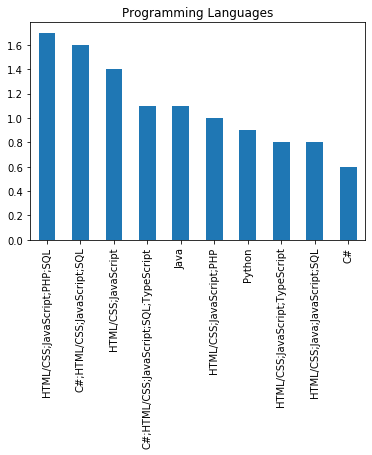

In [54]:
# Top 10 most used Languages
count_values = df.LanguageWorkedWith.value_counts()
#Display the top 10 as percentage
round((count_values[:10]/df.shape[0])*100,1).plot(kind="bar");
plt.title("Programming Languages");

In [12]:
# We have to split the LanguageWorkedWith to get a proper picture
languages = df[df['LanguageWorkedWith'].notnull()]

unique_languages = {}

# split the languages on ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [21]:
# Create a function to be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

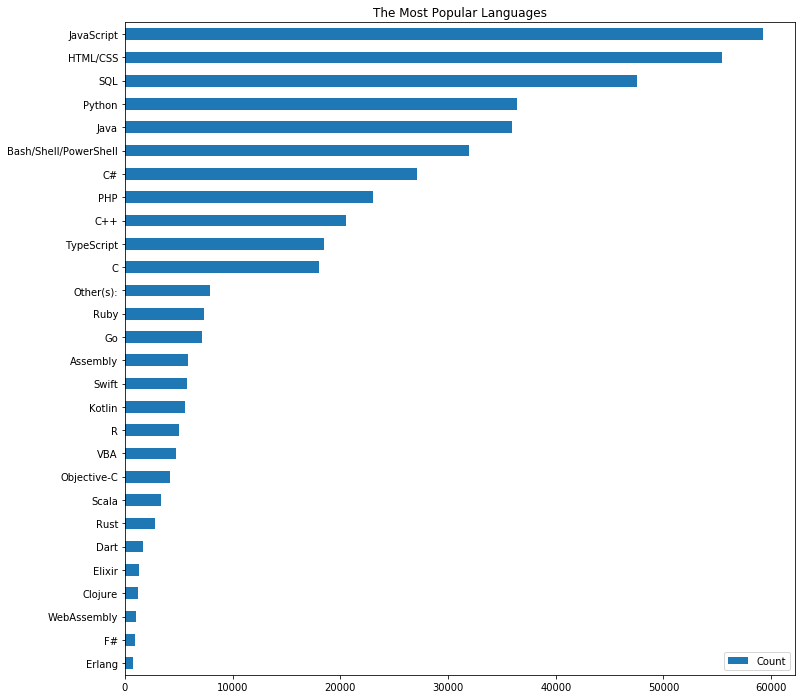

In [22]:
# Plot a bar graph
plot_dimension_count(unique_languages,'The Most Popular Languages')

In [15]:

# We have to split the LanguageWorkedWith to get a proper picture

# Lets get unique developers
developers = df[df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the languages on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

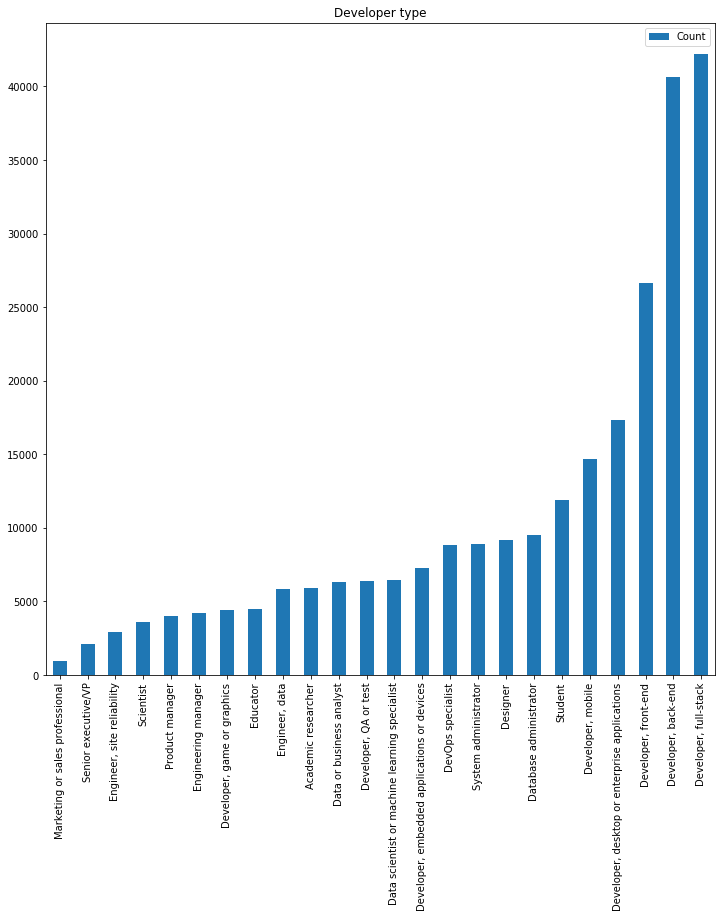

In [20]:
# plot a graph
plot_dimension_count(unique_developers,'Developer type')

## Web framework for Developers

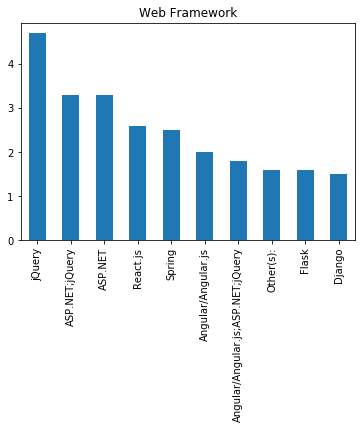

In [53]:
# Counting each LanguageWorkedWith
count_values = df.WebFrameWorkedWith.value_counts()

# display the top 10 as a percentage

round((count_values[:10]/df.shape[0])*100,1).plot(kind="bar");
plt.title("Web Framework");

In [47]:
# We have to split the WebFrameWorkedWith to get a proper picture

# Lets get unique developers
developers = df[df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the developer on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

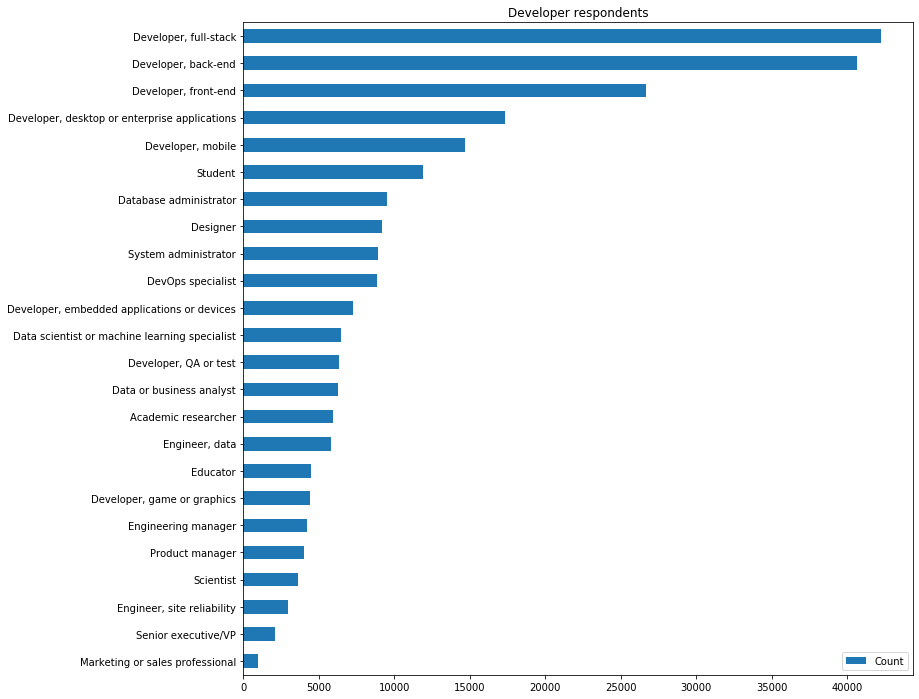

In [48]:
# lets make a bar graph
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)

developer_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Developer respondents');

#### "Data scientist or machine learning specialist" - programming language counts

In [49]:

languages = languages[languages['DevType'].notnull()]

# lets create an empty developer dict
developer_dict={}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# populate the dictionary with languages
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_languages.keys())}
    
# now lets count the number of developers using the language
for key, val in enumerate(languages['DevType']):
    all_developers = val.split(';')
    all_languages = languages.iloc[key, 43].split(';')
    for dev in all_developers:
        for lang in all_languages:
            developer_dict[dev][lang] += 1

developer_language_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T

In [55]:
developer_language_count.head(10)

,Marketing or sales professional,Senior executive/VP,"Engineer, site reliability",Scientist,Product manager,Engineering manager,"Developer, game or graphics",Educator,"Engineer, data",Academic researcher,...,DevOps specialist,System administrator,Designer,Database administrator,Student,"Developer, mobile","Developer, desktop or enterprise applications","Developer, front-end","Developer, back-end","Developer, full-stack"
HTML/CSS,749,1513,1853,1846,2900,2732,2946,3151,3286,3313,...,5907,6480,7243,7253,8122,9181,11178,22285,26605,33329
Java,322,766,1198,1262,1429,1673,2012,1988,2484,2506,...,3651,3484,3621,3657,6482,8409,7739,10021,17904,17201
JavaScript,700,1600,2049,1764,3024,3040,3064,3151,3499,3217,...,6529,6558,7192,7436,7574,9953,11748,23376,29372,36376
Python,373,977,1748,2513,1598,1969,1963,2112,3742,3621,...,4647,4586,3238,3945,6481,4685,6274,8442,16537,15406
C++,190,495,639,1496,894,967,2124,1283,1611,2364,...,1670,2220,2439,2130,4720,3711,5600,5158,9059,7700
C,170,468,647,1230,772,900,1451,1209,1457,2051,...,1614,2200,2150,1897,4519,3352,4287,4418,7761,6694
C#,235,682,711,784,1365,1309,2411,1357,1575,1440,...,2906,2775,3256,3825,3599,5048,9297,9179,14071,15832
SQL,575,1351,1811,1599,2557,2538,2171,2557,3884,2820,...,5721,6066,5526,7778,6179,7536,11006,15630,26031,27674
VBA,131,167,156,281,335,262,283,336,527,369,...,425,833,790,1077,614,700,1672,1508,2094,2192
R,92,154,155,934,234,249,175,476,861,1170,...,403,482,391,581,1100,422,661,820,1647,1553


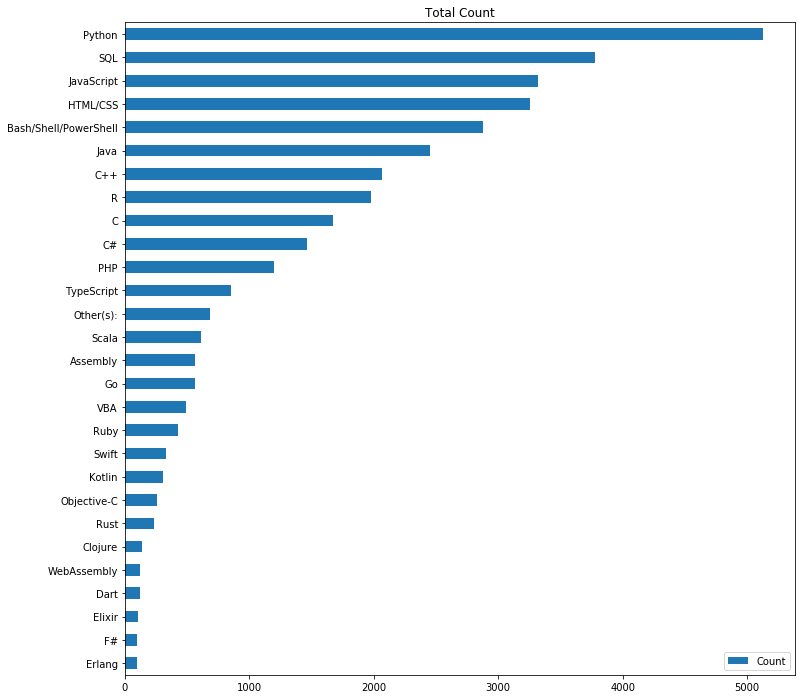

In [51]:
# Now we have a dataframe of language by developer

# lThe distribution is as follows
ds_count = pd.DataFrame(developer_language_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total Count');

#### How's the pay for developers?

In [37]:
salaries_df = df[['DevType', 'Country','ConvertedComp']]

for column in salaries_df.columns.tolist():
    col_desc = schema[schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


In [38]:
# Checking for missing values in salaries_df
salaries_df.isnull().sum()

DevType          7548 
Country          132  
ConvertedComp    33060
dtype: int64

In [39]:
# salaries_df missing values in %
round((salaries_df.isnull().sum()/salaries_df.shape[0])*100,1)

DevType          8.5 
Country          0.1 
ConvertedComp    37.2
dtype: float64

In [40]:
# drop rows with missing values from salaries df
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,ConvertedComp
0,2,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",Thailand,8820.0
1,3,"Developer, full-stack",United States,61000.0
2,5,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Engineer, data",Canada,366420.0
3,8,"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, QA or test;DevOps specialist",New Zealand,95179.0
4,9,"Data or business analyst;Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, game or graphics;Educator",India,13293.0


In [41]:
# Lets make a count of developer by country
clean_salaries_df.Country.value_counts().reset_index()

,index,Country
0,United States,14756
1,United Kingdom,3967
2,India,3953
3,Germany,3734
4,Canada,2225
5,France,1619
6,Brazil,1395
7,Poland,1307
8,Australia,1233
9,Spain,1189


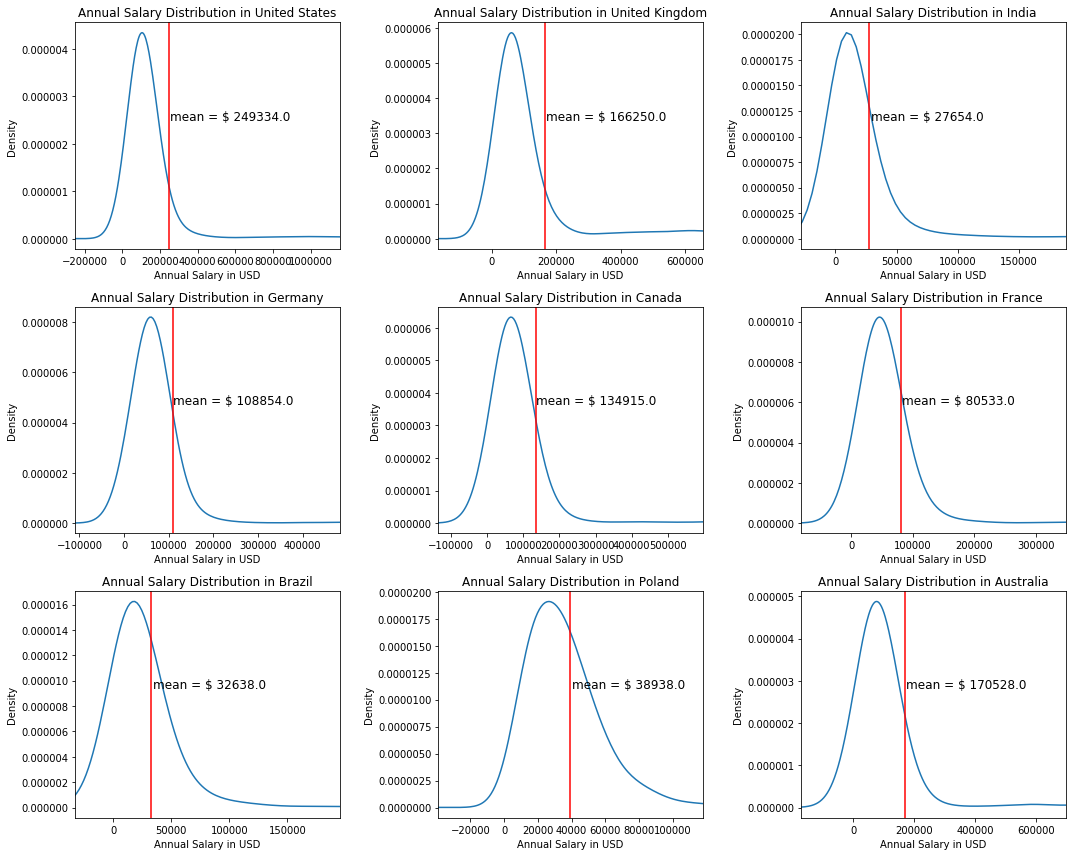

In [46]:
# now lets plot salary distributions for the top 10 countries

fig = plt.figure(figsize=(15,12))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()

In [ ]:
import geopandas as gpd
shapefile = 'data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

In [ ]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(df, left_on = 'country_code', right_on = 'Country')

In [ ]:
# filter phytonistas
pythonistas = df[df.LanguageWorkedWith.str.contains("Python", na=False)]

In [ ]:
# % of pythonistas
f"{pythonistas.shape[0] / df.shape[0]:.2}"

In [ ]:
# to know the number of people that 41% represents
pythonistas.Respondent.count()

#### Open source Python developers

In [ ]:
open_source = pythonistas['OpenSourcer'].value_counts()

In [ ]:
open_source

In [ ]:
#% of pythonistas who used once a moth or more
f"{open_source['Once a month or more often'] / pythonistas.shape[0]:.2}"

In [ ]:
general_opensource = df['OpenSourcer'].value_counts()

In [ ]:
f"{general_opensource['Once a month or more often'] / df.shape[0]:.2}"

In [ ]:
#create a new dataframe with 3 columns
columns=['Hobbyist', 'Dependents', 'Student']
df_new = df[columns]
df_new.head()

In [ ]:
#Mapping a single column of the dataframe
df_new.Student.map({'Yes':1, 'No':0}).head()

In [ ]:
# Check all the distinct Values in the dataframe
df_new.Student.unique()

In [ ]:
# mapping all columns of a dataframe
import numpy as np
new_values = {'Yes':1, 'No':0, 'Yes, full-time':0, 'Yes, part-time':0, np.NaN:0 }
df_new = df_new.apply(lambda x: x.map(new_values))
df_new.head()

In [ ]:
# Mapping headers to columns(method1)
df_new['headers'] = np.where(df_new, df_new.columns, "").sum(axis=1)
df_new.head()